In [3]:
import numpy as np
import pandas as pd
import scipy as scipy
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

In [4]:
def datetime_converter(x):
  x = str(x)
  return (x[0:4] + '-' + x[4:6] + "-" + x[6:8])

#1. 6 factor의 기초통계. long side와 short side를 모두 고려

1-1. 모멘텀 팩터의 long과 short 구성

In [5]:
mom_6 = pd.read_csv('data/6_Portfolios_ME_Prior_12_2_Daily.CSV', index_col=0) / 100

mom_6_date = list(map(datetime_converter, mom_6.index))

mom_6.index = pd.to_datetime(mom_6_date)

mom_6.index.name = 'Date'

mom_long_side = 0.5 * (mom_6['SMALL HiPRIOR'] + mom_6['BIG HiPRIOR'])

mom_short_side = 0.5 * (mom_6['SMALL LoPRIOR'] + mom_6['BIG LoPRIOR'])

wml = mom_long_side - mom_short_side

wml.to_csv('wml.csv')

1-2. 마켓 팩터의 구성

In [6]:
mkt = pd.read_csv('data/F-F_Research_Data_Factors_daily.CSV', index_col=0) / 100

mkt = mkt[['Mkt-RF']]

mkt_date = list(map(datetime_converter, mkt.index))

mkt.index = pd.to_datetime(mkt_date)

mkt.index.name = 'Date'

1-3. 밸류 팩터의 long과 short 구성

In [7]:
value_6 = pd.read_csv('data/6_Portfolios_2x3_daily.csv', index_col = 0) / 100

value_6_date = list(map(datetime_converter, value_6.index))

value_6.index = pd.to_datetime(value_6_date)

value_6.index.name = 'Date'

value_long_side = 0.5 * (value_6['SMALL HiBM'] + value_6['BIG HiBM'])

value_short_side = 0.5 * (value_6['SMALL LoBM'] + value_6['BIG LoBM'])

hml = value_long_side - value_short_side

1-4. 사이즈 팩터의 long과 short 구성

In [8]:
size_6 = pd.read_csv('data/6_Portfolios_2x3_daily.csv', index_col = 0) / 100

size_6_date = list(map(datetime_converter, size_6.index))

size_6.index = pd.to_datetime(size_6_date)

size_6.index.name = 'Date'

size_long_side = 0.33 * (size_6['SMALL HiBM'] + size_6['ME1 BM2'] + size_6['SMALL HiBM'])

size_short_side = 0.33 * (size_6['BIG HiBM'] + size_6['ME2 BM2'] + size_6['BIG HiBM'])

smb = size_long_side - size_short_side

1-5. 이익 팩터의 long과 short 구성

In [9]:
profit_6 = pd.read_csv('data/6_Portfolios_ME_OP_2x3_daily.csv', index_col=0) / 100

profit_6_date = list(map(datetime_converter, profit_6.index))

profit_6.index = pd.to_datetime(profit_6_date)

profit_6.index.name = 'Date'

profit_long_side = 0.5 * (profit_6['SMALL HiOP'] + profit_6['BIG HiOP'])

profit_short_side = 0.5 * (profit_6['SMALL LoOP'] + profit_6['BIG LoOP'])

rmw = profit_long_side - profit_short_side

1-6. 투자 팩터의 long과 short 구성

In [10]:
invest_6 = pd.read_csv('data/6_Portfolios_ME_INV_2x3_daily.CSV', index_col=0) / 100

invest_6_date = list(map(datetime_converter, invest_6.index))

invest_6.index = pd.to_datetime(invest_6_date)

invest_6.index.name = 'Date'

invest_long_side = 0.5 * (invest_6['SMALL LoINV'] + invest_6['BIG LoINV'])

invest_short_side = 0.5 * (invest_6['SMALL HiINV'] + invest_6['BIG HiINV'])

cma = invest_long_side - invest_short_side

1-7 factor의 기초통계

In [11]:
def descriptive_stat_d(x):
  panel = x * 100
  print(panel.index[0])
  print(panel.mean())
  print(panel.std())
  print(panel.skew())
  print(panel.kurt())
  print((panel.mean() / panel.std()) * np.sqrt(252))
  print(panel.min())
  print(panel.max())

def descriptive_stat_m(x):
  panel = x.resample('M').agg(lambda x: (x+1).prod() -1)
  panel = panel * 100
  print(panel.index[0])
  print(panel.mean())
  print(panel.std())
  print(panel.skew())
  print(panel.kurt())
  print((panel.mean() / panel.std()) * np.sqrt(12))
  print(panel.min())
  print(panel.max())

In [12]:
##daily 기준 기초통계

descriptive_stat_d(x=cma)

1963-07-01 00:00:00
0.012427920576635386
0.3646985625924629
-0.34537279339257837
10.479983323856795
0.5409594201694156
-5.894999999999999
2.5300000000000002


In [13]:
##monthly 기준 기초통계

mkt_mtl =  mkt.resample('M').agg(lambda x: (x+1).prod() -1)
smb_mtl = smb.resample('M').agg(lambda x: (x+1).prod() -1)
hml_mtl = hml.resample('M').agg(lambda x: (x+1).prod() -1)
wml_mtl = wml.resample('M').agg(lambda x: (x+1).prod() -1)
rmw_mtl = rmw.resample('M').agg(lambda x: (x+1).prod() -1)
cma_mtl = cma.resample('M').agg(lambda x: (x+1).prod() -1)

In [14]:
descriptive_stat_m(x=cma_mtl)

1963-07-31 00:00:00
0.2665350460714545
1.9845724836308696
0.5560530113562209
2.156886612142034
0.46524099835230603
-7.0002476201814545
10.528649940417822


In [15]:
##daily 기준 long side의 기초통계

descriptive_stat_d(size_long_side)

1926-07-01 00:00:00
0.056829845578285444
1.2171309525347964
0.12022104776009136
24.264433098593912
0.7412068757262915
-15.219600000000003
23.595000000000006


In [16]:
descriptive_stat_m(size_long_side)

1926-07-31 00:00:00
1.3641921349751185
7.6115035650181255
1.6785517727694128
18.389126975687752
0.6208629001823605
-33.905676586938625
73.01424326140678


#2. 6 factor의 long side와 short side의 realized volatility

2-1. correlation matrix for long short

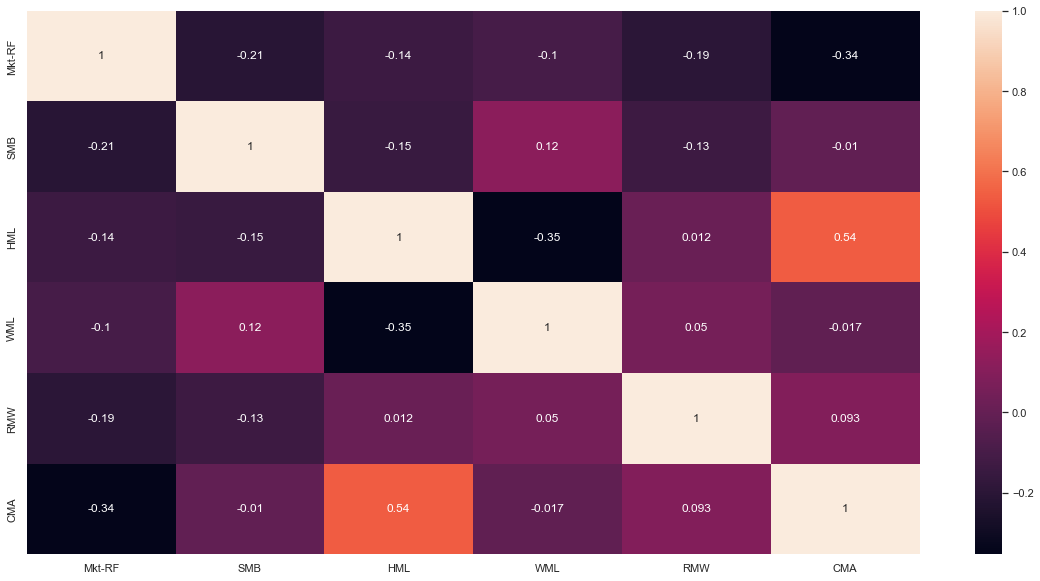

In [17]:
A = pd.merge(pd.DataFrame(mkt), pd.DataFrame(smb, columns = ['SMB']), how = 'inner', on = 'Date')

B = pd.merge(A, pd.DataFrame(hml, columns = ['HML']), how = 'inner', on ='Date')

C = pd.merge(B, pd.DataFrame(wml, columns = ['WML']), how = 'inner', on = 'Date')

D = pd.merge(C, pd.DataFrame(rmw, columns = ['RMW']), how = 'inner', on ='Date')

E = pd.merge(D, pd.DataFrame(cma, columns = ['CMA']), how = 'inner', on ='Date')

sns.heatmap(E.corr(), annot=True)
plt.show()

2-2. conditional realized volatility의 시각화 (rolling 21 days)

In [18]:
def realized_annualized_vol(univariate_series, rolling_periods):
  return ( univariate_series.rolling(window=rolling_periods).std() * np.sqrt(252) ).iloc[rolling_periods-1:]

In [19]:
def vol_ratio_visualizer(factor_long_side, factor_short_side, rolling_periods):
  factor_long_realized_vol = realized_annualized_vol(univariate_series = factor_long_side, rolling_periods = rolling_periods)
  factor_short_realized_vol = realized_annualized_vol(univariate_series= factor_short_side, rolling_periods = rolling_periods)

  factor_vol_ratio = factor_short_realized_vol / factor_long_realized_vol

  factor_vol_ratio = pd.DataFrame(factor_vol_ratio, columns = ['ratio'])

  factor_vol_ratio['mean'] = [float(factor_vol_ratio.mean()) for i in range(len(factor_vol_ratio))]

  return factor_vol_ratio

<AxesSubplot:xlabel='Date'>

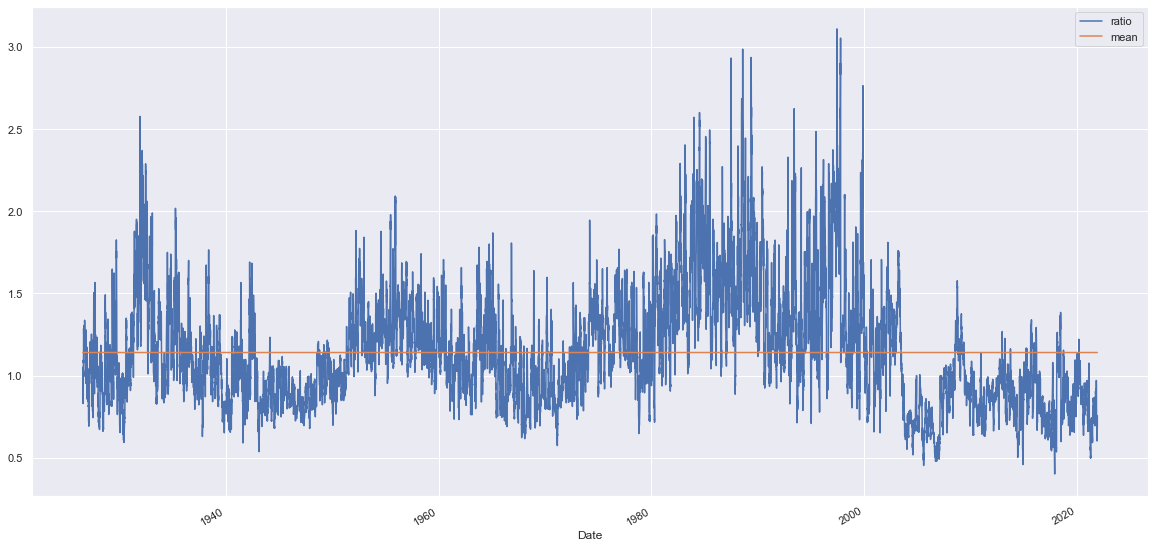

In [20]:
vol_ratio_visualizer(factor_long_side = size_long_side, factor_short_side = size_short_side, rolling_periods = 21).plot()

<AxesSubplot:xlabel='Date'>

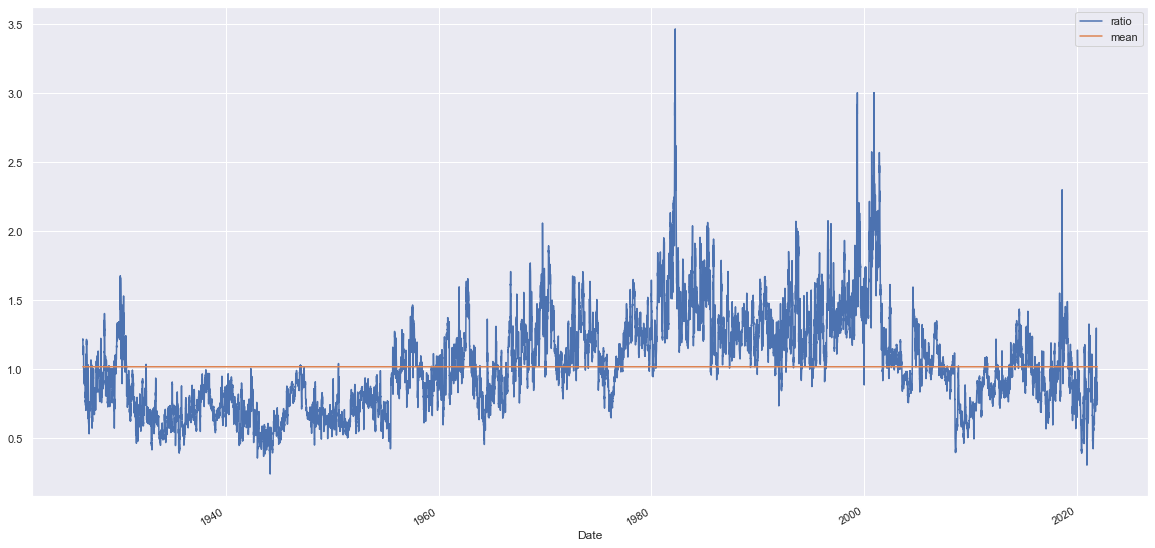

In [21]:
vol_ratio_visualizer(value_long_side, value_short_side, 21).plot()

<AxesSubplot:xlabel='Date'>

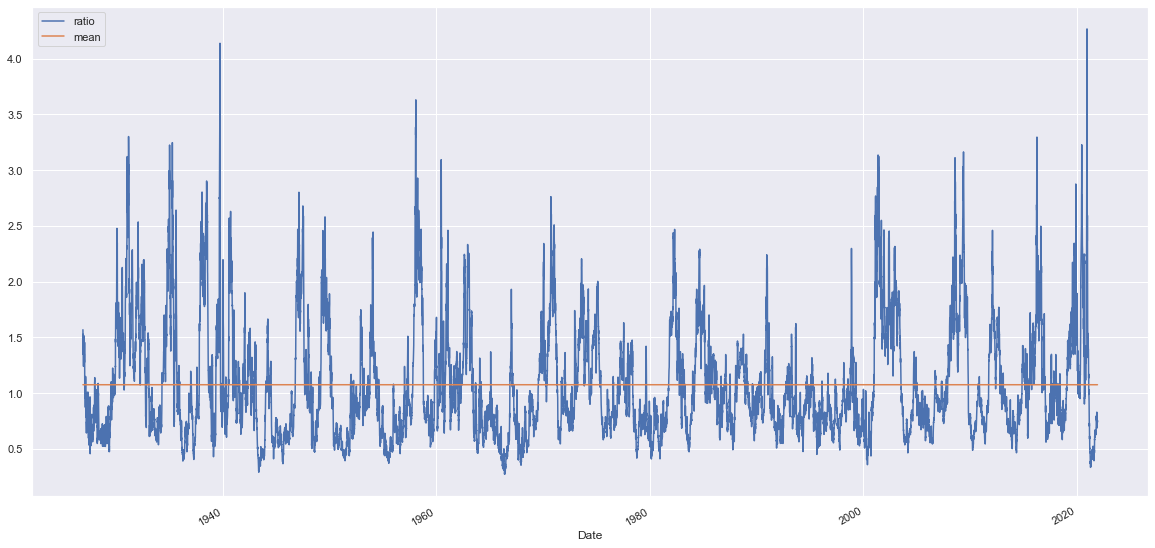

In [22]:
vol_ratio_visualizer(mom_long_side, mom_short_side, 21).plot()

<AxesSubplot:xlabel='Date'>

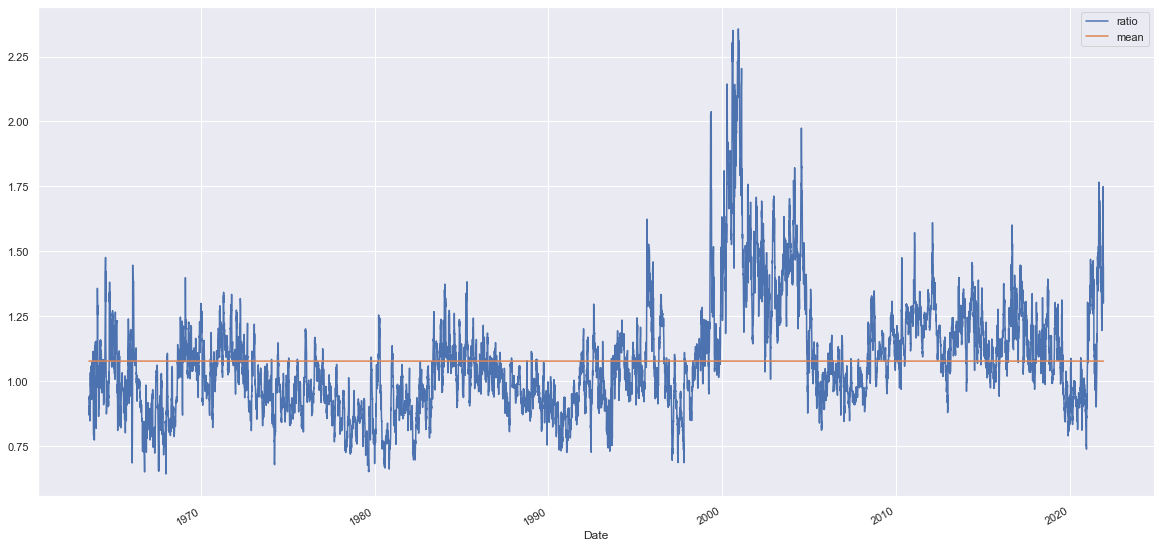

In [23]:
vol_ratio_visualizer(profit_long_side, profit_short_side, 21).plot()

<AxesSubplot:xlabel='Date'>

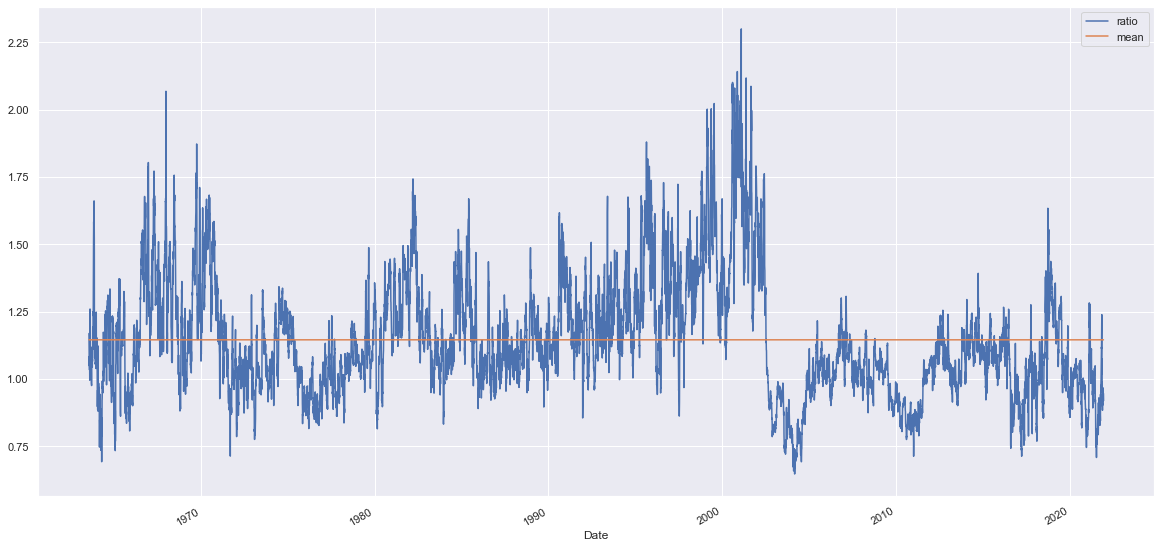

In [24]:
vol_ratio_visualizer(invest_long_side, invest_short_side, 21).plot()

rolling betas for two sides of factors (252)

In [25]:
def rolling_beta_visualizer(mkt, factor_long_side, factor_short_side, rolling_periods):
    panel = pd.merge(pd.DataFrame(mkt),pd.DataFrame(factor_long_side, columns = ['long']), on = 'Date', how = 'inner')
    panel = pd.merge(panel, pd.DataFrame(factor_short_side, columns = ['short']), on = 'Date', how = 'inner')
    model_for_long = RollingOLS(panel['long'], sm.add_constant(panel['Mkt-RF']), window=rolling_periods)
    model_for_short = RollingOLS(panel['short'], sm.add_constant(panel['Mkt-RF']), window=rolling_periods)
    long = model_for_long.fit()
    short = model_for_short.fit()

    result = pd.merge(long.params[['Mkt-RF']], short.params[['Mkt-RF']], on = 'Date', how = 'inner')
    result.columns = ['long', 'short']
    return  result

<AxesSubplot:xlabel='Date'>

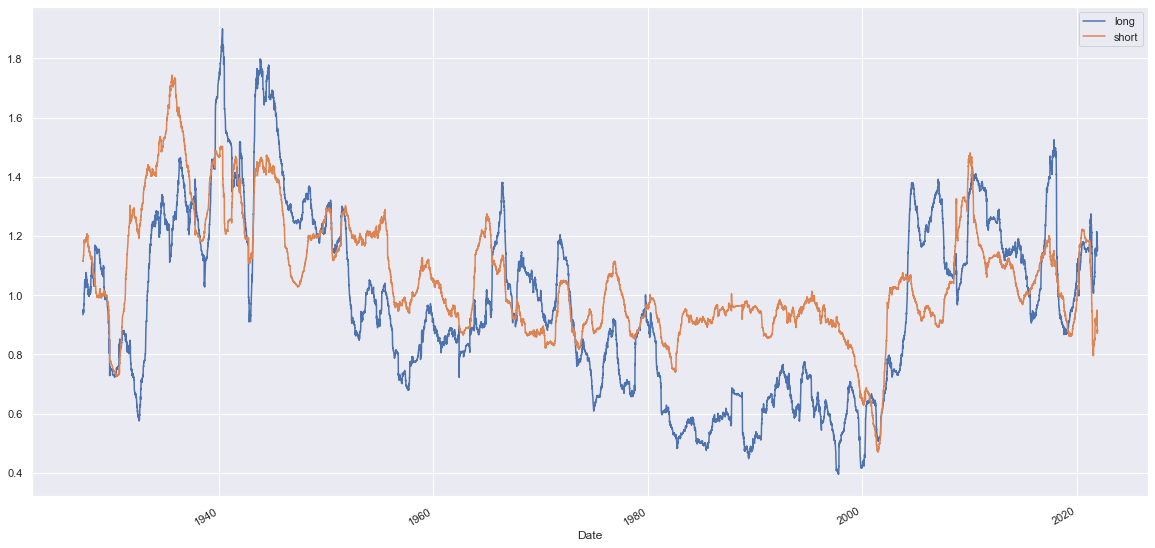

In [26]:
size = rolling_beta_visualizer(mkt,size_long_side,size_short_side,252)
size.plot()

<AxesSubplot:xlabel='Date'>

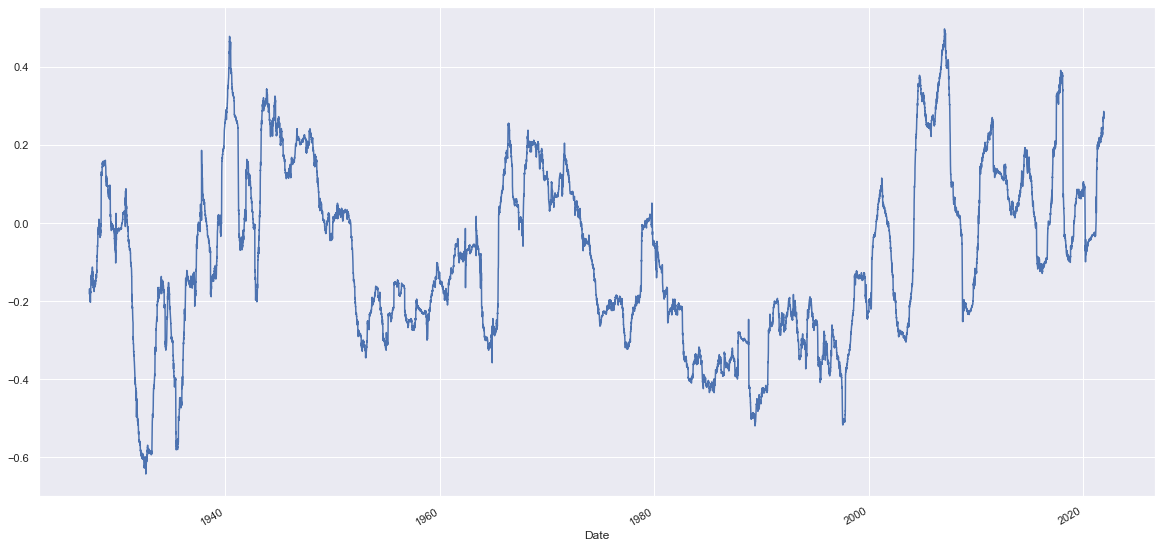

In [27]:
(size['long'] - size['short']).plot()

<AxesSubplot:xlabel='Date'>

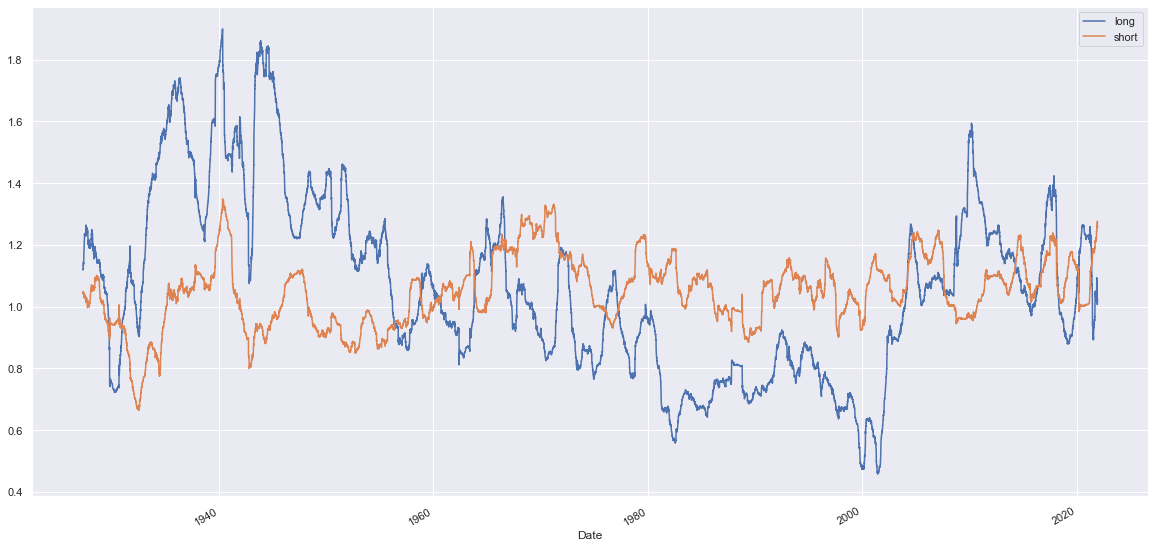

In [28]:
value = rolling_beta_visualizer(mkt,value_long_side,value_short_side,252)
value.plot()

<AxesSubplot:xlabel='Date'>

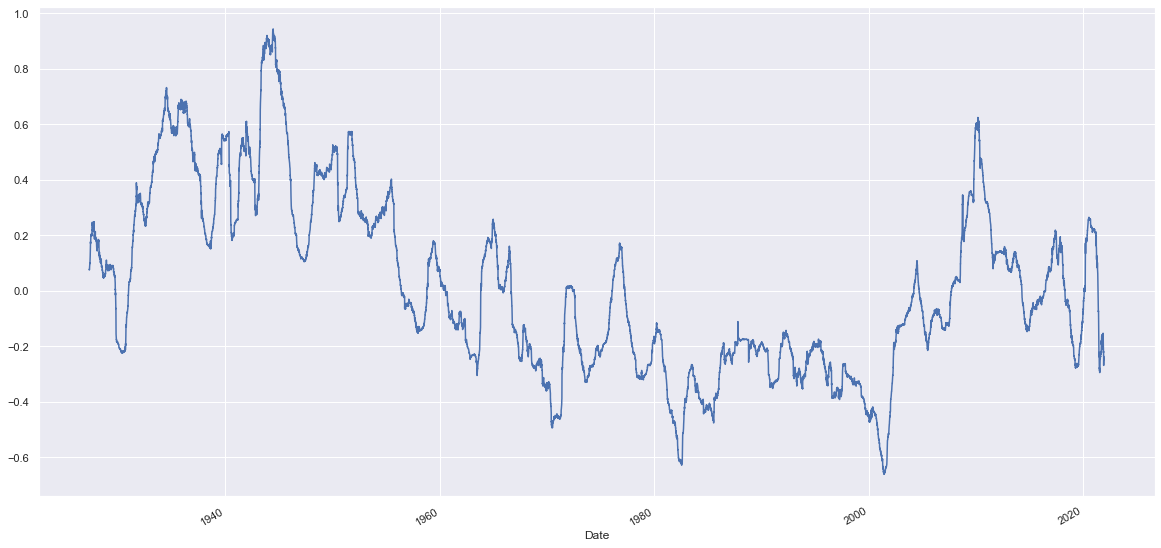

In [29]:
(value['long'] - value['short']).plot()

<AxesSubplot:xlabel='Date'>

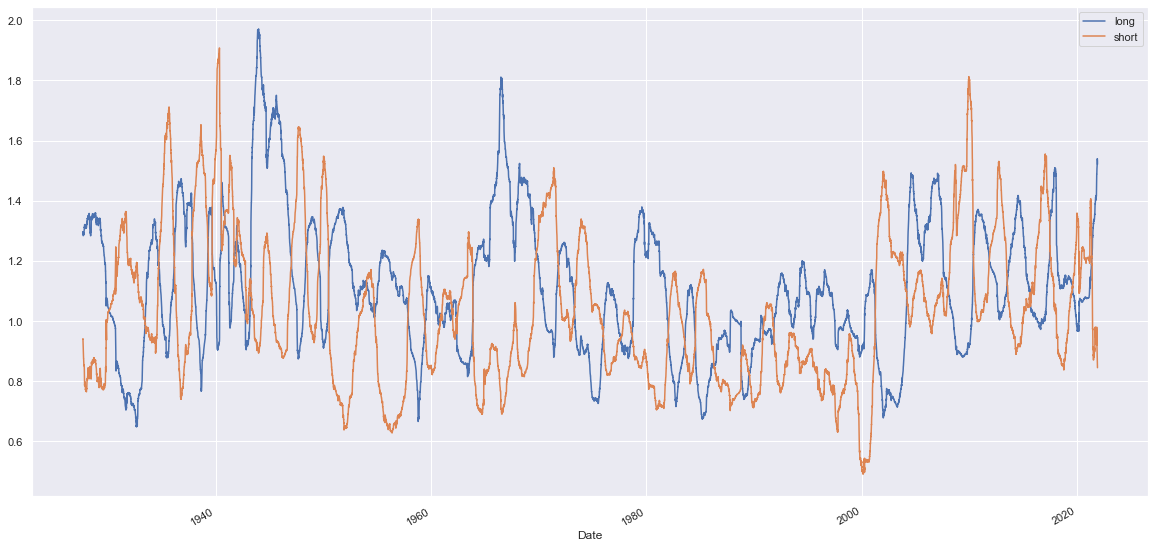

In [30]:
momentum = rolling_beta_visualizer(mkt, mom_long_side,mom_short_side,252)
momentum.plot()

<AxesSubplot:xlabel='Date'>

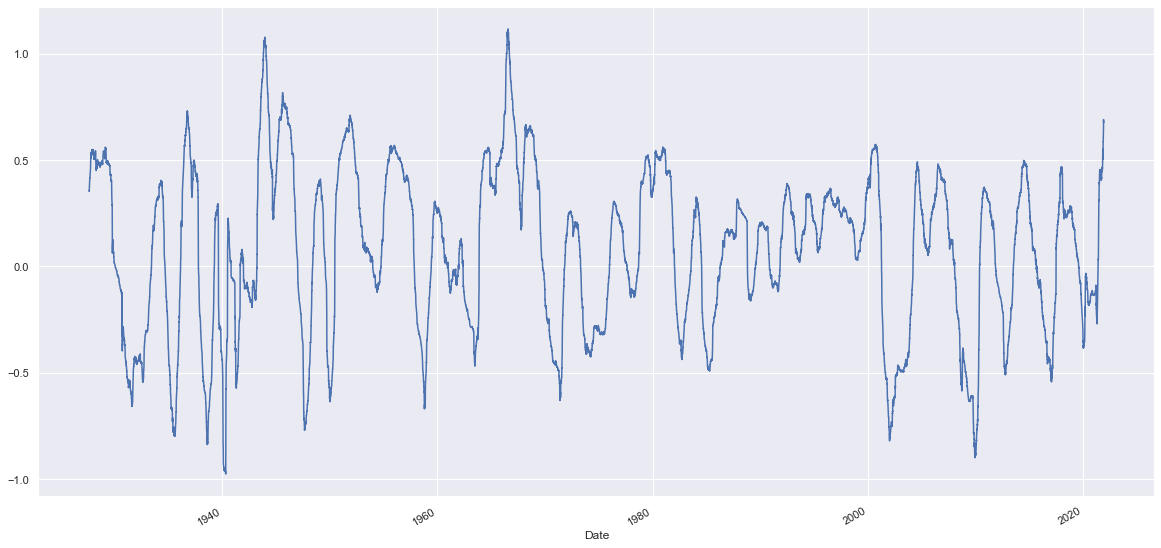

In [31]:
(momentum['long']-momentum['short']).plot()

<AxesSubplot:xlabel='Date'>

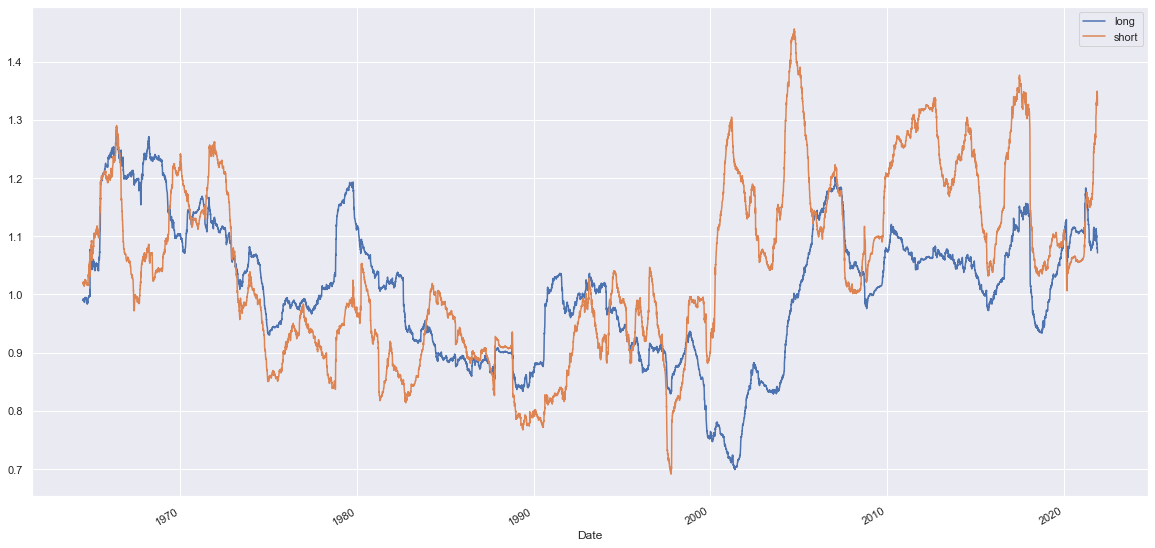

In [32]:
profitability = rolling_beta_visualizer(mkt,profit_long_side,profit_short_side,252)
profitability.plot()

<AxesSubplot:xlabel='Date'>

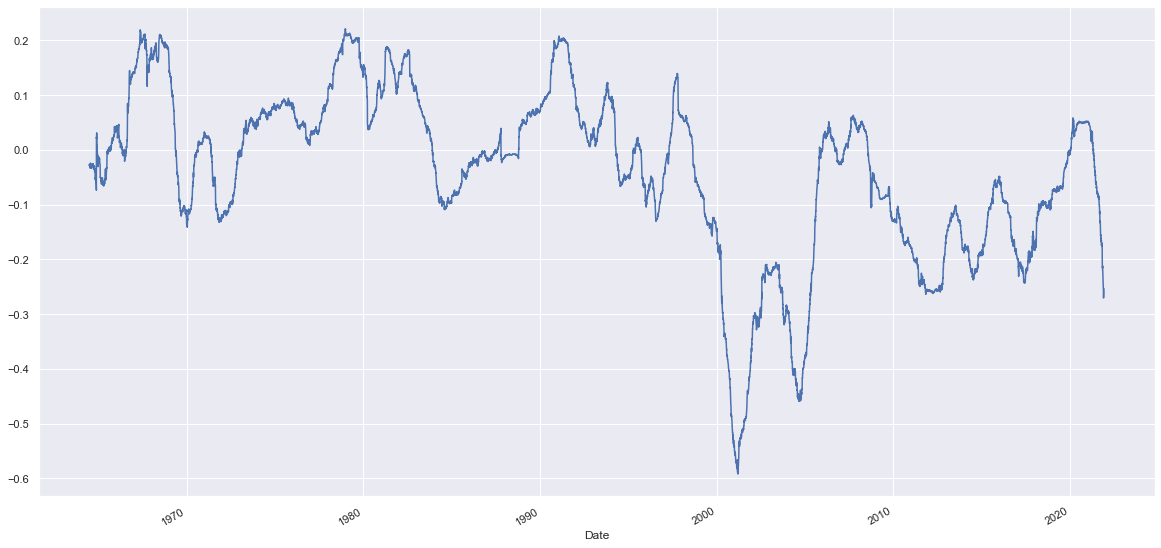

In [33]:
(profitability['long']-profitability['short']).plot()

<AxesSubplot:xlabel='Date'>

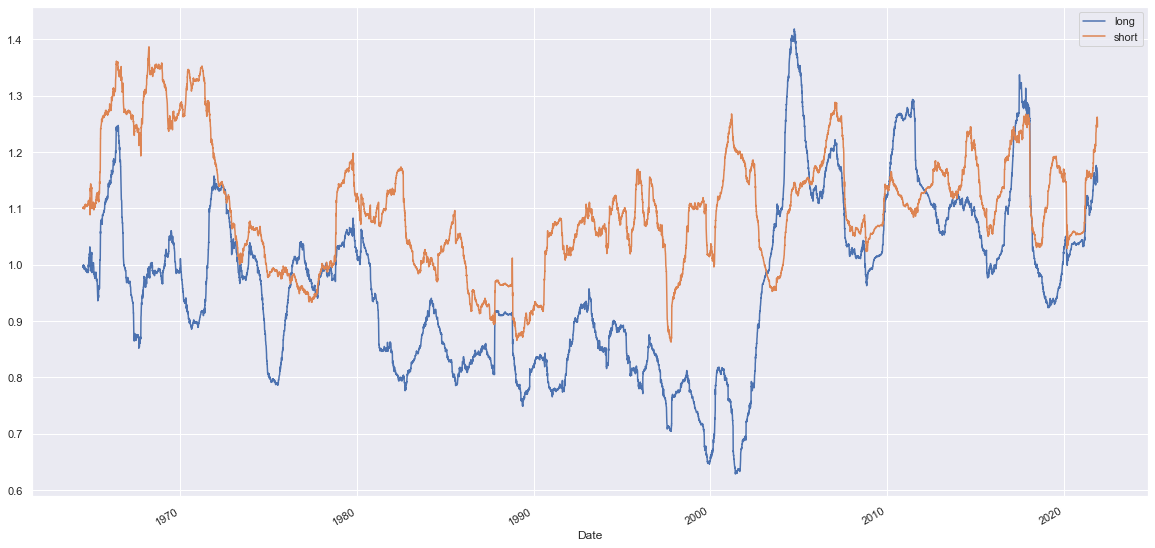

In [34]:
investment = rolling_beta_visualizer(mkt,invest_long_side,invest_short_side,252)
investment.plot()

<AxesSubplot:xlabel='Date'>

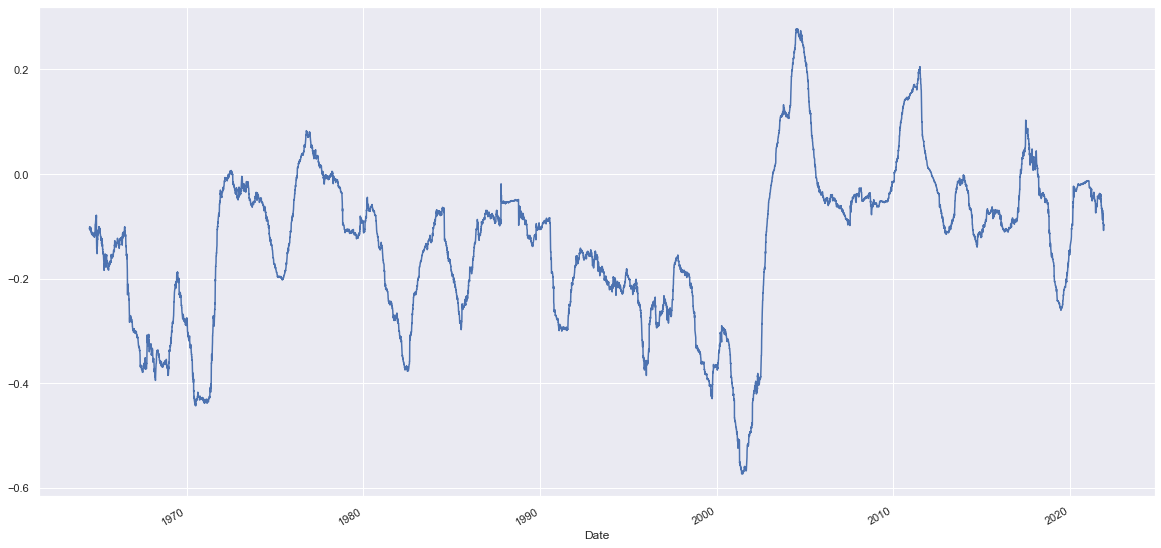

In [35]:
(investment['long']-investment['short']).plot()

#3. exponentially smoothing covariance targeting

In [78]:
from vol_target import Ewm_Beta_Target

<AxesSubplot:xlabel='Date'>

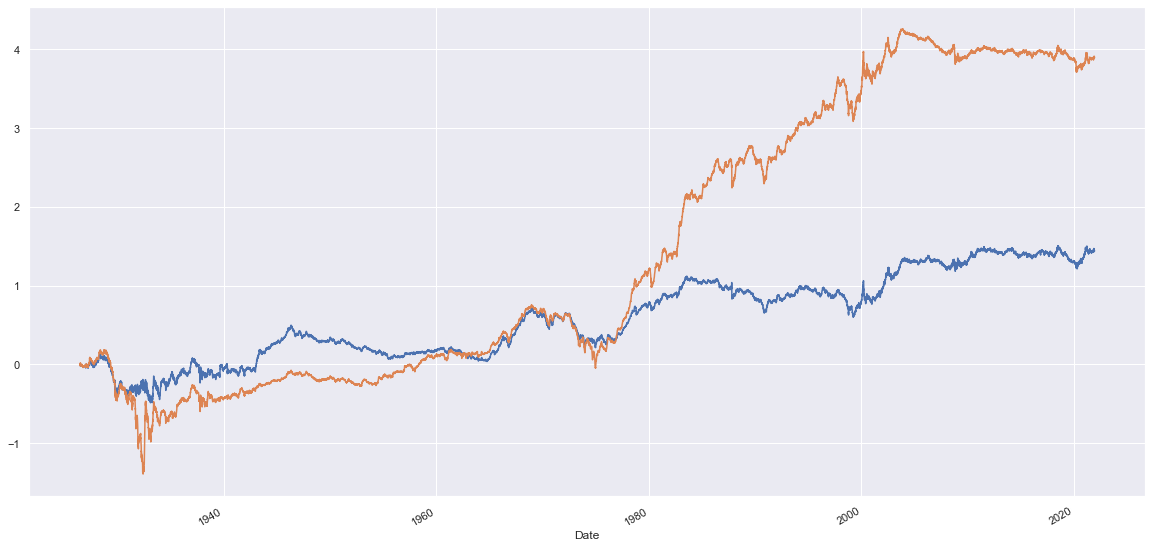

In [79]:
size = Ewm_Beta_Target(leverage_upper = 2, leverage_lower = 0.5,mkt = mkt, factor_long_side = size_long_side, factor_short_side = size_short_side, target_beta = 1, lagging_days = 1)
np.log(1+smb).cumsum().plot()
np.log(1+size.beta_target_ewma_maker()).cumsum().plot()

<AxesSubplot:xlabel='Date'>

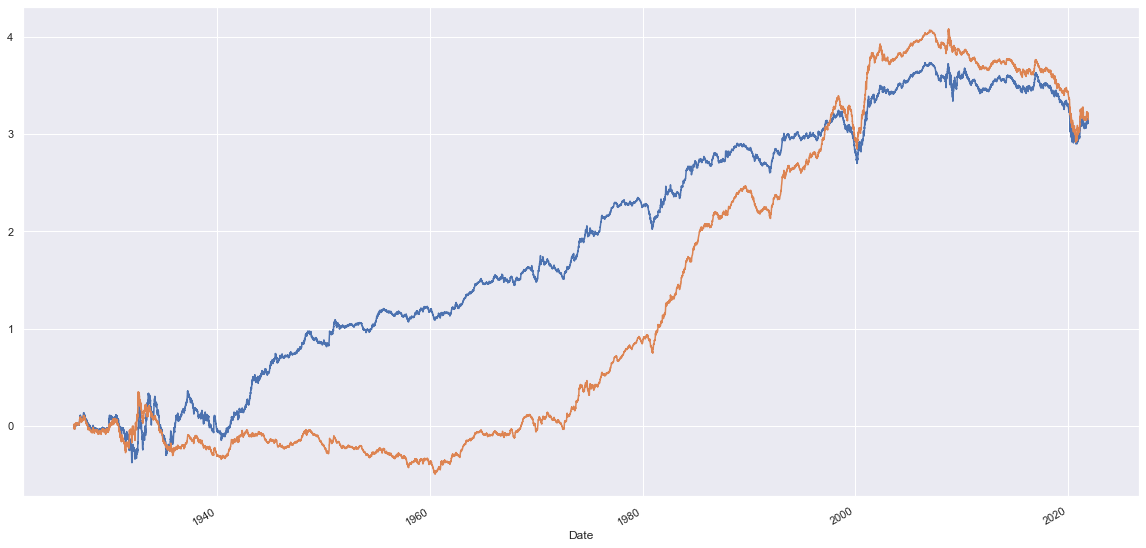

In [64]:
value = Ewm_Beta_Target(2,0.5,mkt,value_long_side,value_short_side,1,2)
np.log(1+hml).cumsum().plot()
np.log(1+value.beta_target_ewma_maker()).cumsum().plot()

<AxesSubplot:xlabel='Date'>

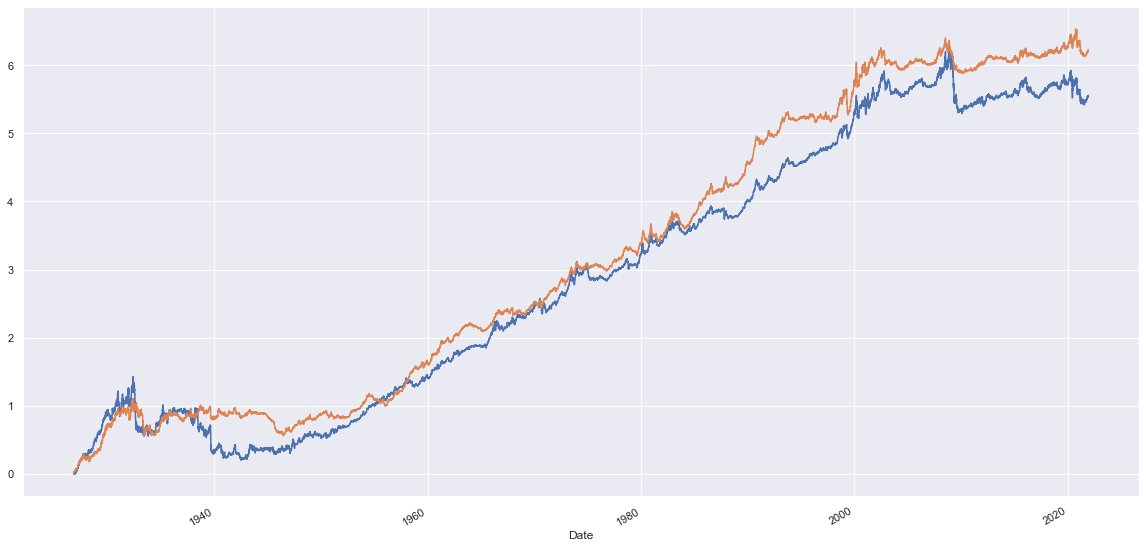

In [65]:
mom = Ewm_Beta_Target(2,0.5,mkt,mom_long_side,mom_short_side,1,2)
np.log(1+wml).cumsum().plot()
np.log(1+mom.beta_target_ewma_maker()).cumsum().plot()

<AxesSubplot:xlabel='Date'>

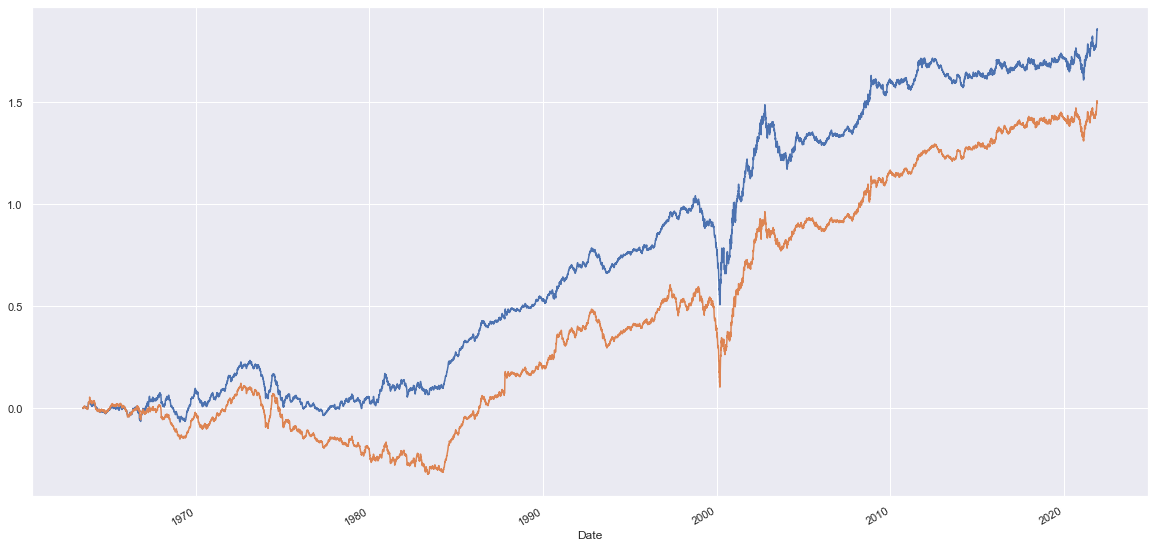

In [66]:
prof = Ewm_Beta_Target(2,0.5,mkt,profit_long_side,profit_short_side,1,2)
np.log(1+rmw).cumsum().plot()
np.log(1+prof.beta_target_ewma_maker()).cumsum().plot()

<AxesSubplot:xlabel='Date'>

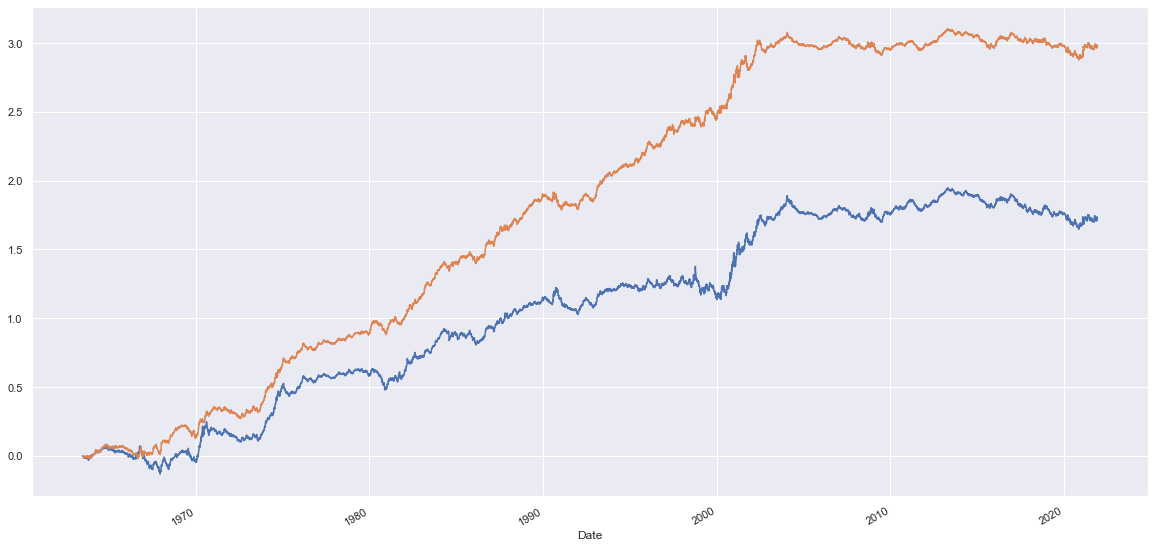

In [67]:
investing = Ewm_Beta_Target(2,0.5,mkt,invest_long_side,invest_short_side,1,2)
np.log(1+cma).cumsum().plot()
np.log(1+investing.beta_target_ewma_maker()).cumsum().plot()

ordinary least square

#ols : factor return을 realized volatility에 회귀

In [68]:
sm.OLS(smb.iloc[3:], sm.add_constant(smb.rolling(window=21, min_periods=0).std().shift(2).iloc[3:]*np.sqrt(252))).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.2447
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.621
Time:                        18:42:37   Log-Likelihood:                 91539.
No. Observations:               25123   AIC:                        -1.831e+05
Df Residuals:                   25121   BIC:                        -1.831e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.519e-05      0.000      0.140      0.888      -0.000       0.000
0              0.0008      0.002      0.495      0.621      -0.002       0.004
==============================================================================
Omnibus:                     8049.841   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           453629.573
Skew:                          -0.739   Prob(JB):                         0.00
Kurtosis:                      23.765   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [69]:
sm.OLS(hml.iloc[3:], sm.add_constant(hml.rolling(window=21, min_periods=0).std().shift(2).iloc[3:]*np.sqrt(252))).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.411
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.235
Time:                        18:42:44   Log-Likelihood:                 92281.
No. Observations:               25123   AIC:                        -1.846e+05
Df Residuals:                   25121   BIC:                        -1.845e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.188e-06      0.000     -0.031      0.975      -0.000       0.000
0              0.0019      0.002      1.188      0.235      -0.001       0.005
==============================================================================
Omnibus:                     7074.066   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274316.264
Skew:                           0.654   Prob(JB):                         0.00
Kurtosis:                      19.135   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [70]:
sm.OLS(wml.iloc[3:], sm.add_constant(wml.rolling(window=21, min_periods=0).std().shift(2).iloc[3:]*np.sqrt(252))).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.14
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           0.000846
Time:                        18:42:47   Log-Likelihood:                 86180.
No. Observations:               25022   AIC:                        -1.724e+05
Df Residuals:                   25020   BIC:                        -1.723e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      6.157      0.000       0.001       0.001
0             -0.0051      0.002     -3.338      0.001      -0.008      -0.002
==============================================================================
Omnibus:                    12192.463   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           844687.355
Skew:                          -1.508   Prob(JB):                         0.00
Kurtosis:                      31.304   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [71]:
sm.OLS(rmw.iloc[3:], sm.add_constant(rmw.rolling(window=21, min_periods=0).std().shift(2).iloc[3:]*np.sqrt(252))).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.989
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.159
Time:                        18:42:50   Log-Likelihood:                 60961.
No. Observations:               14703   AIC:                        -1.219e+05
Df Residuals:                   14701   BIC:                        -1.219e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.177e-05      0.000     -0.509      0.611      -0.000       0.000
0              0.0039      0.003      1.410      0.158      -0.002       0.009
==============================================================================
Omnibus:                     2496.500   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52386.349
Skew:                           0.140   Prob(JB):                         0.00
Kurtosis:                      12.243   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [72]:
sm.OLS(cma.iloc[3:], sm.add_constant(cma.rolling(window=21, min_periods=0).std().shift(2).iloc[3:]*np.sqrt(252))).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.309
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.129
Time:                        18:42:53   Log-Likelihood:                 61683.
No. Observations:               14703   AIC:                        -1.234e+05
Df Residuals:                   14701   BIC:                        -1.233e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.117e-05      0.000     -0.561      0.575      -0.000       0.000
0              0.0037      0.002      1.519      0.129      -0.001       0.009
==============================================================================
Omnibus:                     3111.556   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71199.767
Skew:                          -0.445   Prob(JB):                         0.00
Kurtosis:                      13.744   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

#ols : factor return을 ewma dynamic conditional beta에 회귀

In [87]:
size.beta_target_ewma_maker()

Date
1926-07-06    0.003844
1926-07-07   -0.012726
1926-07-08   -0.008366
1926-07-09    0.013462
1926-07-10   -0.003830
                ...   
2021-11-23   -0.017663
2021-11-24    0.000904
2021-11-26    0.007869
2021-11-29   -0.003342
2021-11-30    0.014103
Length: 25124, dtype: float64

In [111]:
def factor_ewma_beta_generator(mkt,factor_long_short, com=10.65):
    factor_panel = pd.merge(pd.DataFrame(factor_long_short,columns = ['longshort']),mkt, on = 'Date', how = 'inner')
    # print(factor_panel.ewm(com=com).cov())
    predicted_beta = (factor_panel.ewm(com=com).cov()['longshort'][:,'Mkt-RF'] / factor_panel.ewm(com=com).cov()['Mkt-RF'][:,'Mkt-RF'])

    return predicted_beta

In [112]:
sm.OLS(smb.iloc[3:], sm.add_constant(factor_ewma_beta_generator(mkt,smb).shift(2).iloc[3:])).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2235
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.636
Time:                        19:04:11   Log-Likelihood:                 91539.
No. Observations:               25123   AIC:                        -1.831e+05
Df Residuals:                   25121   BIC:                        -1.831e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.92e-05   3.68e-05      1.879      0.060   -2.97e-06       0.000
0          -7.929e-05      0.000     -0.473      0.636      -0.000       0.000
==============================================================================
Omnibus:                     7913.782   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           451753.523
Skew:                          -0.707   Prob(JB):                         0.00
Kurtosis:                      23.726   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [113]:
sm.OLS(hml.iloc[3:], sm.add_constant(factor_ewma_beta_generator(mkt,hml).shift(2).iloc[3:])).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0001866
Date:                Wed, 19 Jan 2022   Prob (F-statistic):              0.989
Time:                        19:04:48   Log-Likelihood:                 92277.
No. Observations:               25123   AIC:                        -1.845e+05
Df Residuals:                   25121   BIC:                        -1.845e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   3.91e-05      3.666      0.000    6.66e-05       0.000
0          -1.893e-06      0.000     -0.014      0.989      -0.000       0.000
==============================================================================
Omnibus:                     7421.654   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278307.798
Skew:                           0.737   Prob(JB):                         0.00
Kurtosis:                      19.239   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [114]:
sm.OLS(wml.iloc[3:], sm.add_constant(factor_ewma_beta_generator(mkt,wml).shift(2).iloc[3:])).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.722
Date:                Wed, 19 Jan 2022   Prob (F-statistic):            0.00953
Time:                        19:05:19   Log-Likelihood:                 86157.
No. Observations:               25022   AIC:                        -1.723e+05
Df Residuals:                   25020   BIC:                        -1.723e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002    5.7e-05      3.991      0.000       0.000       0.000
0              0.0004      0.000      2.593      0.010    9.64e-05       0.001
==============================================================================
Omnibus:                    12976.850   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           866446.730
Skew:                          -1.679   Prob(JB):                         0.00
Kurtosis:                      31.632   Cond. No.                         2.11
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [115]:
sm.OLS(rmw.iloc[3:], sm.add_constant(factor_ewma_beta_generator(mkt,rmw).shift(2).iloc[3:])).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.695
Date:                Wed, 19 Jan 2022   Prob (F-statistic):            0.00320
Time:                        19:05:57   Log-Likelihood:                 60966.
No. Observations:               14703   AIC:                        -1.219e+05
Df Residuals:                   14701   BIC:                        -1.219e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   2.94e-05      3.419      0.001    4.29e-05       0.000
0             -0.0009      0.000     -2.949      0.003      -0.001      -0.000
==============================================================================
Omnibus:                     2547.406   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53418.302
Skew:                           0.188   Prob(JB):                         0.00
Kurtosis:                      12.330   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [116]:
sm.OLS(cma.iloc[3:], sm.add_constant(factor_ewma_beta_generator(mkt,cma).shift(2).iloc[3:])).fit(cov_type='HAC', cov_kwds={'maxlags':1}).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.665
Date:                Wed, 19 Jan 2022   Prob (F-statistic):            0.00984
Time:                        19:06:18   Log-Likelihood:                 61685.
No. Observations:               14703   AIC:                        -1.234e+05
Df Residuals:                   14701   BIC:                        -1.234e+05
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.12e-05   3.36e-05      1.227      0.220   -2.46e-05       0.000
0             -0.0006      0.000     -2.582      0.010      -0.001      -0.000
==============================================================================
Omnibus:                     3027.461   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69444.177
Skew:                          -0.408   Prob(JB):                         0.00
Kurtosis:                      13.616   Cond. No.                         5.60
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""